# Introduction to Neural Networks

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Part 1: Logistic regression and the neuron

There is a very close link between the logistic regression we discussed in week 6, and a neural net that has no hidden layers, just input and output layers. The code below generates two normally distributed datasets that we give class labels zero and one.

1. Plot a simple histgram of two datasets, just to visualize.

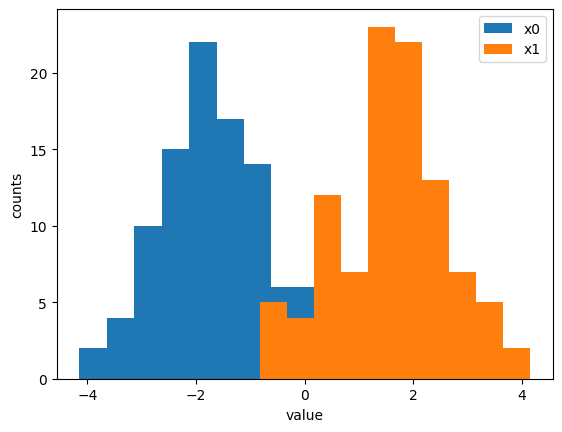

In [55]:
from matplotlib import pyplot as plt

normal = np.random.normal
# Data:
x0 = normal(-1.5, 1, 100)
x1 = normal(1.5, 1, 100)
# labels: 
y0 = np.zeros_like(x0)
y1 = np.ones_like(x1)

counts, bins = np.histogram(x0)
plt.hist(bins[:-1], bins, weights=counts, label = 'x0')

counts, bins = np.histogram(x1)
plt.hist(bins[:-1], bins, weights=counts, label = 'x1')

plt.xlabel('value')
plt.ylabel('counts')
plt.legend()
plt.show()

2. Concatenate the two arrays x0,x1 to a feature array x, and y0,y1 to a class array y. The feature array must be reshaped to (200, 1), so that the first dimension indexes the example and the second contains the value.

In [61]:
X = np.concatenate((x0,x1))
y = np.concatenate((y0,y1))
X = X.reshape(-1,1)
X.shape

(200, 1)

3. Perform logistic regression on the dataset to try to separate the two classes. Use solver='lbfgs'. Make a plot of the predicted probability (from predict_proba()) versus x, and add the data as a scatter plot.

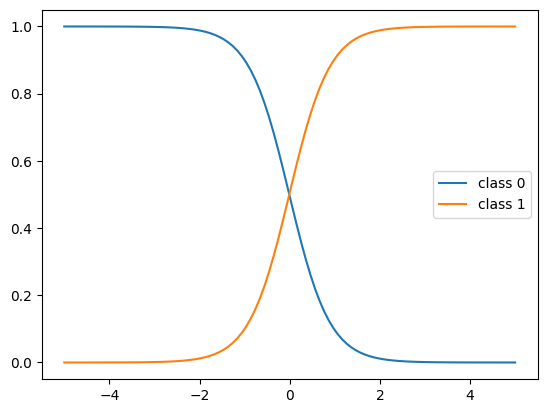

In [67]:
from sklearn.linear_model import LogisticRegression

x = np.linspace(-5, 5, 100)
model = LogisticRegression(random_state=0)
model.fit(X, y)
pred = model.predict(X)
pred_prob = model.predict_proba(x.reshape(-1,1))



plt.plot(x, pred_prob[:,0], label = 'class 0')
plt.plot(x, pred_prob[:,1], label = 'class 1')
plt.legend()
plt.show()

4. Now let's do the same with a single neuron. Import MLPClassifier from sklearn.neural_network. Set *activation="logistic",hidden_layer_sizes=(),solver='lbfgs'* to get a network with no hidden layers. Fit to the data and add the predicted probability from the MLP to the plot you created above. What is the relationship between the neuron and the logistic regression?

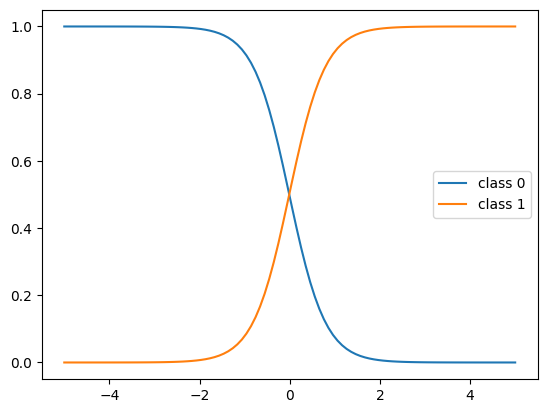

In [68]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='logistic', max_iter=1000, solver='lbfgs',
                      random_state=42, hidden_layer_sizes=())

model.fit(X, y)
y_pred = model.predict(X)

x = np.linspace(-5, 5, 100)
pred_prob = model.predict_proba(x.reshape(-1,1))
plt.plot(x, pred_prob[:,0], label = 'class 0')
plt.plot(x, pred_prob[:,1], label = 'class 1')
plt.legend()
plt.show()

## Part 2: Beyond linear regression

In the above example, the two datasets were linearly separable so that logistic regression worked well. Let's now look at a dataset where that is not the case. Run the cell below.

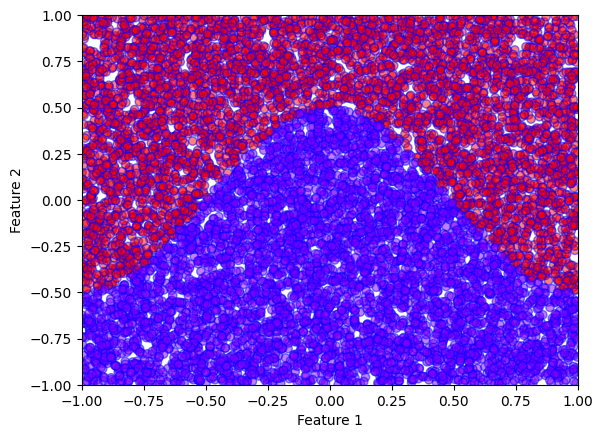

In [ ]:
# Construct the dataset
sX = np.random.uniform(low=-1, high=1, size=(10000,2))
sY = np.array([0 if s[1]<=0.5*np.cos(np.pi*s[0]) else 1 for s in sX])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(-5,5)
plt.scatter(
    sX[:,0],
    sX[:,1],
    c=sY,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

1. Clearly the boundary between the two classes is not linear. Nevertheless, apply logistic regression and plot the prediction in the same manner as in the graph above, coloring the data points by class label. What is the accuracy score? What can logistic regression achieve here?

In [6]:
model = LogisticRegression(random_state=0)
model.fit(sX, sY)
sY_pred = model.predict(sX)

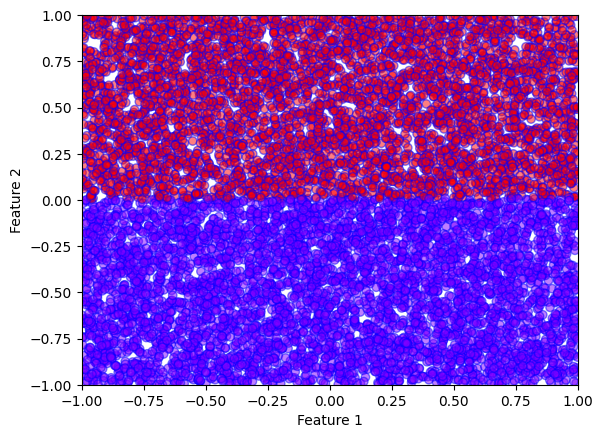

In [ ]:
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(-5,5)
plt.scatter(
    sX[:,0],
    sX[:,1],
    c=sY_pred,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

2. Now let's try to do better with a neural network. Use again the MLPClassifier, activation='logistic', max_iter=1000, solver='lbfgs',random_state=42. Try the single neuron first as in part 1, then make the net "deeper" by giving it hidden layers. Try a single hidden layer with 3 neurons, or 2 hidden layers with 2 neurons each. Any luck separating the data? What accuracy do you get?

accuracy score for 1 neuron, 1 h-layer: 0.8411
accuracy score for 3 neuron, 1 h-layer: 0.9959
accuracy score for 2 neuron, 2 h-layer: 0.8369


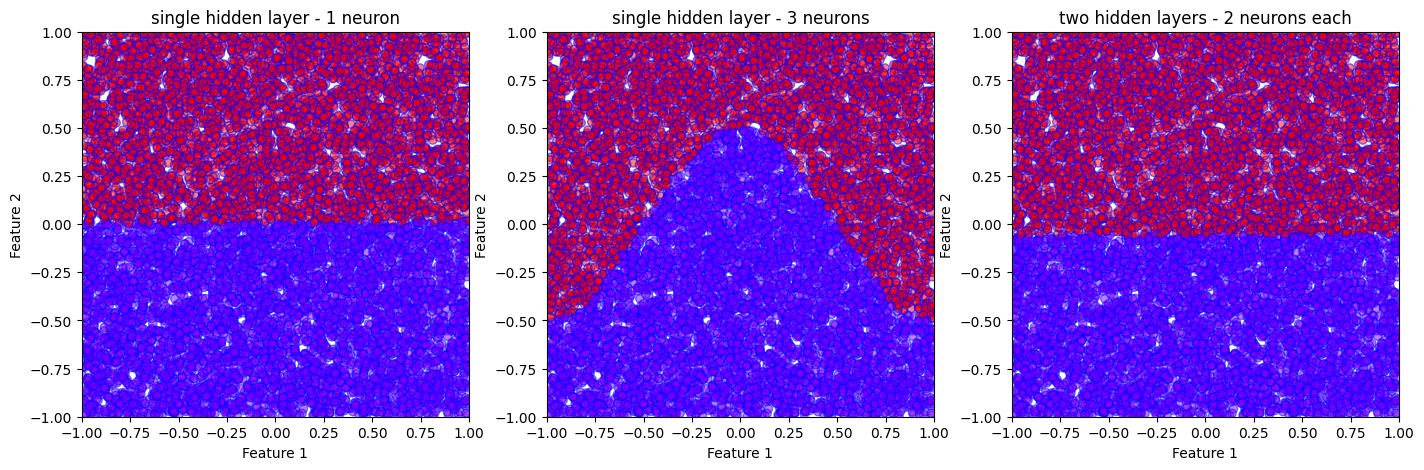

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

fig, axes = plt.subplots(1, 3, figsize=(17, 5))
model = MLPClassifier(activation='logistic', max_iter=1000, solver='lbfgs',
                      random_state=42, hidden_layer_sizes=(1,))
model.fit(sX, sY)
sY_pred = model.predict(sX)
score = accuracy_score(sY, sY_pred)
print('accuracy score for 1 neuron, 1 h-layer: {:.4f}'.format(score))

axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].set_ylim(-5,5)
axes[0].scatter(
    sX[:,0],
    sX[:,1],
    c=sY_pred,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
axes[0].set_xlim(-1,1)
axes[0].set_ylim(-1,1)
axes[0].set_title("single hidden layer - 1 neuron")

model = MLPClassifier(activation='logistic', max_iter=1000, solver='lbfgs',
                      random_state=42, hidden_layer_sizes=(3,))
model.fit(sX, sY)
sY_pred = model.predict(sX)
score = accuracy_score(sY, sY_pred)
print('accuracy score for 3 neuron, 1 h-layer: {:.4f}'.format(score))

axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_ylim(-5,5)
axes[1].scatter(
    sX[:,0],
    sX[:,1],
    c=sY_pred,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
axes[1].set_xlim(-1,1)
axes[1].set_ylim(-1,1)
axes[1].set_title("single hidden layer - 3 neurons")

model = MLPClassifier(activation='logistic', max_iter=1000, solver='lbfgs',
                      random_state=42, hidden_layer_sizes=(2,2))
model.fit(sX, sY)
sY_pred = model.predict(sX)
score = accuracy_score(sY, sY_pred)
print('accuracy score for 2 neuron, 2 h-layer: {:.4f}'.format(score))

axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].set_ylim(-5,5)
axes[2].scatter(
    sX[:,0],
    sX[:,1],
    c=sY_pred,
    cmap='rainbow',
    alpha=0.5,
    edgecolors='b'
)
axes[2].set_xlim(-1,1)
axes[2].set_ylim(-1,1)
axes[2].set_title("two hidden layers - 2 neurons each")
plt.show()


# Part 3: Solving the XOR problem with neural nets

As discussed in textbook and lecture, the XOR problem can be solved with two coupled neurons. Below are example data and true labels for this problem.
1. Try to solve this classification using the MLPClassifier, solver='lbfgs',random_state=42. Try different activation functions and print the predictions you get. Can you find an architecture that works (consulting the textbook allowed!).

 - **relu and tanh work**

In [46]:
inputs = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
expected_output = np.array([0,1,1,0])

print('expected_output:')
print(expected_output)

model1 = MLPClassifier(activation='identity', max_iter=1000, solver='lbfgs',
                      random_state=42)
model1.fit(inputs, expected_output)
predicted = model1.predict(inputs)
print('identity activation prediction:')
print(predicted)

model2 = MLPClassifier(activation='logistic', max_iter=1000, solver='lbfgs',
                      random_state=42)
model2.fit(inputs, expected_output)
predicted = model2.predict(inputs)
print('logistic activation prediction:')
print(predicted)

model3 = MLPClassifier(activation='relu', max_iter=1000, solver='lbfgs',
                      random_state=42)
model3.fit(inputs, expected_output)
predicted = model3.predict(inputs)
print('relu activation prediction:')
print(predicted)


model4 = MLPClassifier(activation='tanh', max_iter=1000, solver='lbfgs',
                      random_state=42)
model4.fit(inputs, expected_output)
predicted = model4.predict(inputs)
print('tanh activation prediction:')
print(predicted)


expected_output:
[0 1 1 0]
identity activation prediction:
[0 0 1 1]
logistic activation prediction:
[0 0 1 1]
relu activation prediction:
[0 1 1 0]
tanh activation prediction:
[0 1 1 0]


2. Use DecisionBoundaryDisplay (see week 2) to produce a graph that looks like fig. 8.2 in the textbook.

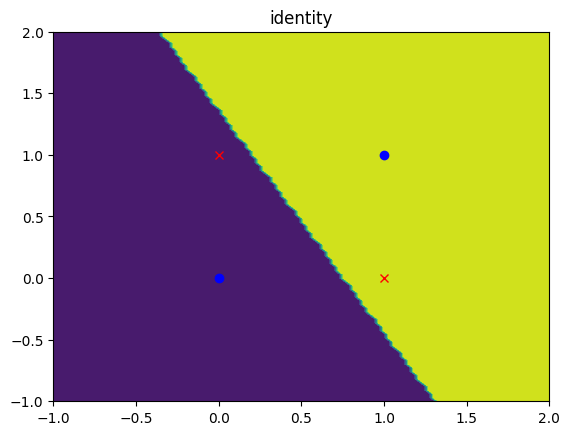

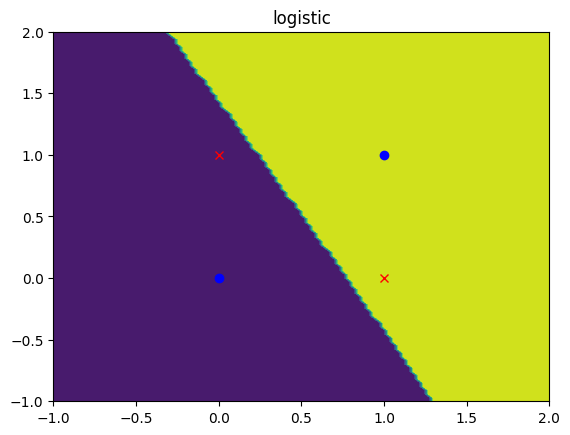

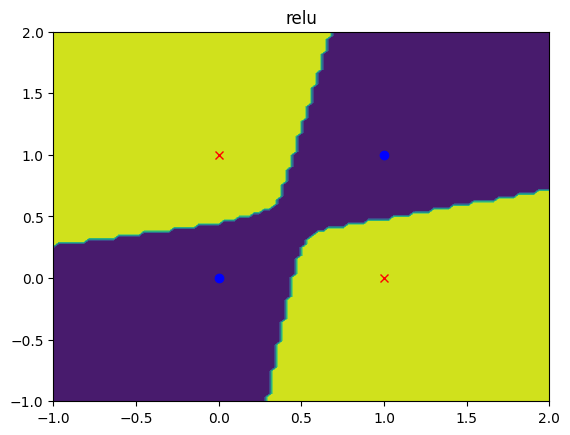

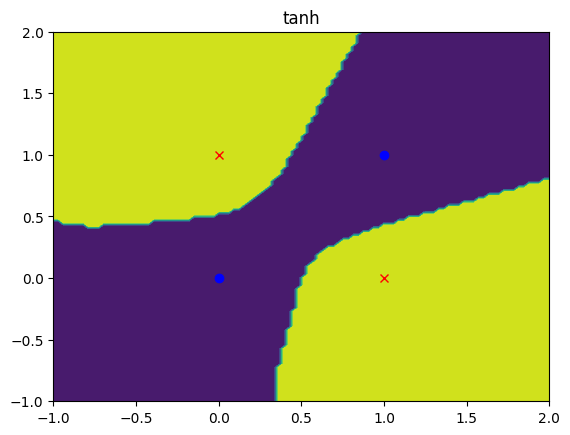

In [51]:
from sklearn.inspection import DecisionBoundaryDisplay

model = MLPClassifier(activation='identity', max_iter=1000, solver='lbfgs',
                      random_state=42)
model.fit(inputs, expected_output)

DecisionBoundaryDisplay.from_estimator(model1, inputs, response_method = 'predict')
plt.plot(inputs[:,0][expected_output==0], inputs[:,1][expected_output==0], 'bo', label = 'true val = 0')
plt.plot(inputs[:,0][expected_output==1], inputs[:,1][expected_output==1], 'rx', label = 'true val = 1')
plt.title("identity")
plt.show()

DecisionBoundaryDisplay.from_estimator(model2, inputs, response_method = 'predict')
plt.plot(inputs[:,0][expected_output==0], inputs[:,1][expected_output==0], 'bo', label = 'true val = 0')
plt.plot(inputs[:,0][expected_output==1], inputs[:,1][expected_output==1], 'rx', label = 'true val = 1')
plt.title("logistic")
plt.show()

DecisionBoundaryDisplay.from_estimator(model3, inputs, response_method = 'predict')
plt.plot(inputs[:,0][expected_output==0], inputs[:,1][expected_output==0], 'bo', label = 'true val = 0')
plt.plot(inputs[:,0][expected_output==1], inputs[:,1][expected_output==1], 'rx', label = 'true val = 1')
plt.title("relu")
plt.show()

DecisionBoundaryDisplay.from_estimator(model4, inputs, response_method = 'predict')
plt.plot(inputs[:,0][expected_output==0], inputs[:,1][expected_output==0], 'bo', label = 'true val = 0')
plt.plot(inputs[:,0][expected_output==1], inputs[:,1][expected_output==1], 'rx', label = 'true val = 1')
plt.title("tanh")
plt.show()


## Part 4: A dense neural network with keras and tensorflow

From now on, we will upgrade our neural network computation by using tensorflow with the keras backend. You might need to add this to your installation, perhaps in a separate environment for better version control.

Tensorflow is a very commonly used library used in development of Deep Learning models. It is an open-source platform that was developed by Google. It supports programming in several languages, e.g. C++, Java, Python, and many others.

Keras is a high-level API (Application Programming Interface) that is built on top of TensorFlow (or Theano, another Deep Learning library). It is Python-specific, and we can think of it as the equivalent of the sklearn library for neural network. It is less general, and less customizable, but it is very user-friendly and comparatively easier than TensorFlow. We will use keras with the tensorflow back-end.

In [54]:
pip install tensorflow

  Using cached tensorflow-2.16.1-cp310-cp310-macosx_10_15_x86_64.whl (259.5 MB)
  Using cached tensorflow_io_gcs_filesystem-0.36.0-cp310-cp310-macosx_10_14_x86_64.whl (2.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl (394 kB)
  Using cached h5py-3.10.0-cp310-cp310-macosx_10_9_x86_64.whl (3.3 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached grpcio-1.62.1.tar.gz (26.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached wrapt-1.16.0-cp310-cp310-macosx_10_9_x86_64.whl (37 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-macosx_10_9_universal2.whl (389 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
  Using cached flatbuffers-24.3.7-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none

In [53]:
import tensorflow as tf
import keras

ModuleNotFoundError: No module named 'tensorflow'

For a first experiment, we will check out the famous MNIST dataset. Each data sample in the MNIST dataset, a 28×28
 grayscale image, comes with a label, which holds the information which digit is stored in the image. The difficulty of learning to recognize the digits is that handwriting styles are incredibly personal and different people will write the digit “4” slightly differently. It would be very challenging to hardcode all the criteria to recognize “4” and not confuse it with, say, a “9”.

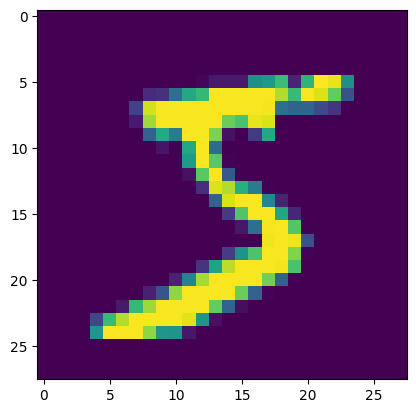

In [6]:
# Load Dataset 
(x_train , y_train), (x_test , y_test) = keras.datasets.mnist.load_data()

# Standardise the data to have a spread of 1
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.imshow(x_train[0]);

In [9]:
# Here is our first NN model with keras:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

What is the architecture of this network? What is 'softmax' and why is it used here?

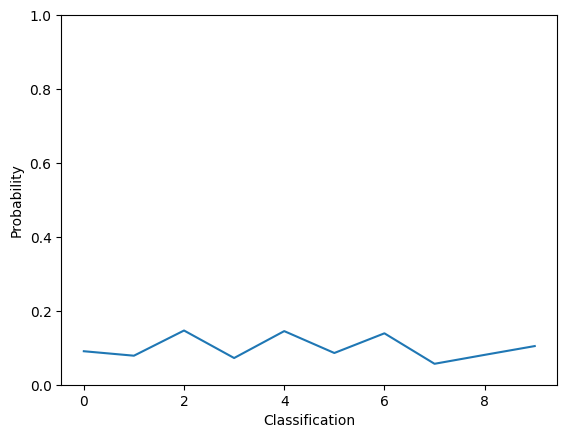

In [10]:
# Lets look at the model's prediction before training it
pred = model(x_train[0:1])
plt.plot(pred[0])
plt.ylim([0,1])
plt.xlabel('Classification')
plt.ylabel('Probability')
plt.show()

How do you interpret this result?

In [13]:
# Compile and train the model
# run the cell, takes a bit of time
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0889 - accuracy: 0.9732 - val_loss: 0.1308 - val_accuracy: 0.9635
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0839 - accuracy: 0.9740 - val_loss: 0.1241 - val_accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0805 - accuracy: 0.9750 - val_loss: 0.1241 - val_accuracy: 0.9652
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0770 - accuracy: 0.9764 - val_loss: 0.1262 - val_accuracy: 0.9637
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.9772 - val_loss: 0.1287 - val_accuracy: 0.9637
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0707 - accuracy: 0.9784 - val_loss: 0.1334 - val_accuracy: 0.9625
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0684 - accuracy: 0.9787 - val_loss: 0.1270 - val_accuracy:

Repeat the plot from before training with the fitted model. Are you satisfied with the result?

Let's look at the information in the history attribute. Run print(history.history.keys()), which shows you the labels to access training and validation score and loss, resp. Make two graphs of these scores and losses, respectively, versus number of training "epochs". Should we train more?